In [11]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from mpl_toolkits import mplot3d

In [2]:
filepath = "/Users/rajeshr/Desktop/Assignment1/Group22/Regression/BivariateData/22.csv"
data = pd.read_csv(filepath, header=None, delimiter=",")
data

,0,1,2
0,0.22,0.15,2.27500
1,0.46,0.01,4.96820
2,0.55,0.63,3.63130
3,0.47,0.04,5.01020
4,0.05,0.88,-0.71169
...,...,...,...
10196,0.66,0.45,3.15950
10197,0.45,0.42,4.12860
10198,0.03,0.26,0.57689
10199,0.01,0.72,-0.51562


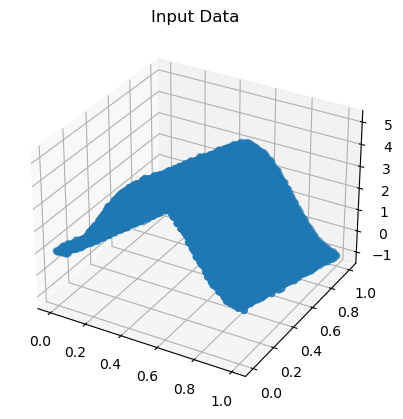

In [14]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(data.iloc[:,0], data.iloc[:,1], data.iloc[:,2], cmap='Greens')
plt.title("Input Data")
plt.savefig("/Users/rajeshr/Desktop/"+str(np.random.randint(1, 100000))+".png")
plt.show()

In [4]:
def split_data(data):
    m, n = data.shape
    l1 = int(0.6*m)
    l2 = l1 + int(0.2*m)
    training = data.iloc[:l1]
    validation = data.iloc[l1:l2]
    test = data.iloc[l2:m]
    
    return training, validation, test

In [21]:
training, validation, test = split_data(data)
training

,0,1,2
0,0.22,0.15,2.27500
1,0.46,0.01,4.96820
2,0.55,0.63,3.63130
3,0.47,0.04,5.01020
4,0.05,0.88,-0.71169
...,...,...,...
6115,0.49,0.53,3.95850
6116,0.09,0.41,0.53437
6117,0.87,0.19,1.26240
6118,0.47,0.39,4.24730


In [19]:
np.random.seed(0)

def train_data(xn):
    w = np.random.randn(3)
    epoch = 100
    print(w)
    avg_err = []
    mse = []
    
    while(epoch):
        err = []
        for i in range(len(xn)):
            
            xi = [1, xn.iat[i, 0], xn.iat[i, 1]]
            yn = xn.iat[i, 2]
            
            sn = np.dot(w.T, xi)
            
            error = 0.5*(yn-sn)**2
            err.append(error)

            eta = 0.001
            w = w + eta*np.dot((yn-sn), xi)

        avg_error = sum(err)/(2*len(err))
        avg_err.append(avg_error)
        epoch -= 1
        mse.append(np.sqrt(sum(err)/len(err)))
    
    print(avg_error, w)
    return w, avg_err, mse
    
w, avg_err, mse = train_data(training)

[1.76405235 0.40015721 0.97873798]
0.5068347181951954 [ 2.98093789  0.06748757 -2.02060887]


In [25]:
def testdata(xn, w):
    
    y = []
    for i in range(len(xn)):
        y.append(np.dot(w.T, [1, xn.iat[i, 0], xn.iat[i, 1]]))
    
    return y

y = testdata(validation, w)
#y

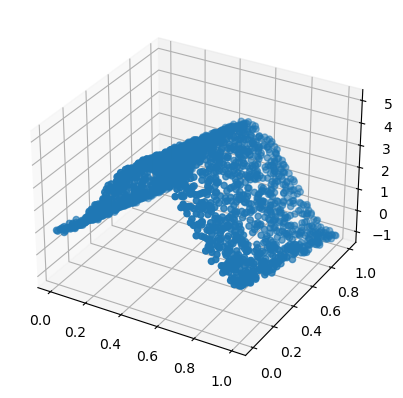

In [12]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(validation.iloc[:,0], validation.iloc[:,1], validation.iloc[:,2], cmap='Greens')
plt.show()

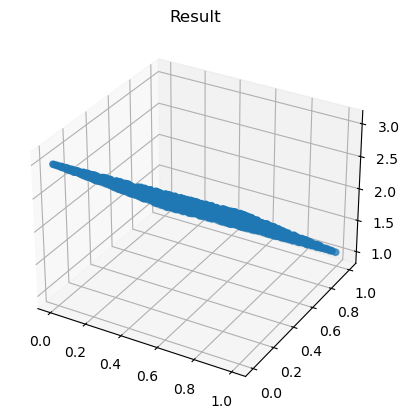

In [15]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(validation.iloc[:,0], validation.iloc[:,1], y, cmap='Greens')
plt.title("Result")
plt.savefig("/Users/rajeshr/Desktop/"+str(np.random.randint(1, 100000))+".png")
plt.show()

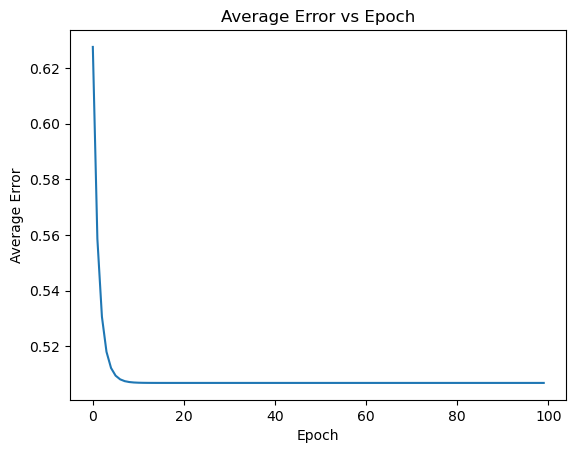

In [17]:
plt.plot(avg_err)
plt.title("Average Error vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Average Error")
plt.savefig("/Users/rajeshr/Desktop/errorvsepoch.png")
plt.show()

[0.76103773 0.12167502 0.44386323]
0.5068347181951954 [ 2.98093789  0.06748757 -2.02060887]
[ 0.33367433  1.49407907 -0.20515826]
0.5000517755752012 [ 2.93071136 -0.04606186 -1.91616824]
[ 0.3130677  -0.85409574 -2.55298982]
0.5094046533487553 [ 3.07338883 -0.16991437 -1.99429858]


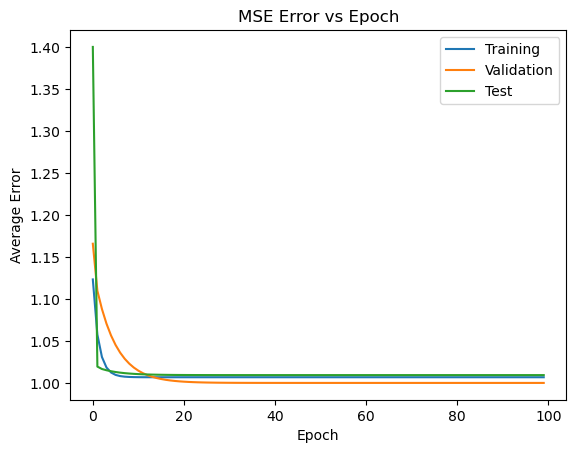

In [22]:
wtr, avg_errtr, msetr = train_data(training)
wv, avg_errv, msev = train_data(validation)
wt, avg_errt, mset = train_data(test)

plt.plot(msetr)
plt.plot(msev)
plt.plot(mset)

plt.title("MSE Error vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Average Error")
plt.legend(["Training", "Validation", "Test"])
plt.savefig("/Users/rajeshr/Desktop/msevsepoch.png")
plt.show()

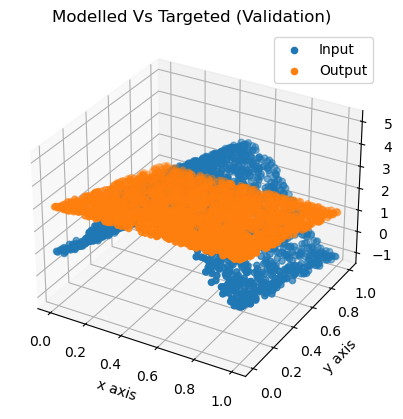

In [28]:
y = testdata(validation, w)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(validation.iloc[:,0], validation.iloc[:,1], validation.iloc[:,2], cmap='Greens')
ax.scatter3D(validation.iloc[:,0], validation.iloc[:,1], y)

plt.title("Modelled Vs Targeted (Validation) ")
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.legend(['Input', 'Output'])
plt.savefig("/Users/rajeshr/Desktop/"+str(np.random.randint(1, 100000))+".png")
plt.show()

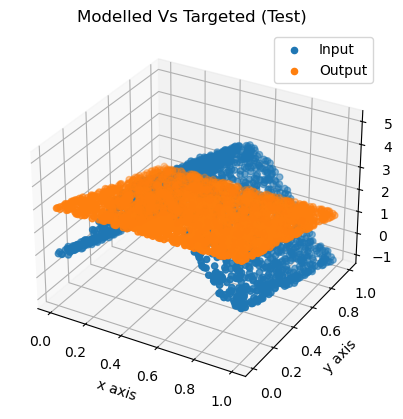

In [29]:
y = testdata(test, w)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(test.iloc[:,0], test.iloc[:,1], test.iloc[:,2], cmap='Greens')
ax.scatter3D(test.iloc[:,0], test.iloc[:,1], y)

plt.title("Modelled Vs Targeted (Test) ")
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.legend(['Input', 'Output'])
plt.savefig("/Users/rajeshr/Desktop/"+str(np.random.randint(1, 100000))+".png")
plt.show()

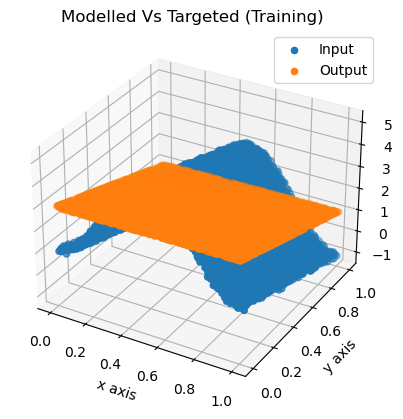

In [30]:
y = testdata(training, w)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(training.iloc[:,0], training.iloc[:,1], training.iloc[:,2], cmap='Greens')
ax.scatter3D(training.iloc[:,0], training.iloc[:,1], y)

plt.title("Modelled Vs Targeted (Training) ")
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.legend(['Input', 'Output'])
plt.savefig("/Users/rajeshr/Desktop/"+str(np.random.randint(1, 100000))+".png")
plt.show()